In [102]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
import skimage.io as io
from pathlib import Path
from tqdm import tqdm_notebook as tqdm
import warnings

In [101]:
#fish data
data = Path('../train_rsz')
#fish labels
lbl_fish = Path('../fish/lbl_fish_rsz')
lbl_fish_detailed = Path('../fish/lbl_fish_det')

In [2]:
df = pd.read_csv('../train.csv')

In [92]:
df.head(6)

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...
5,002be4f.jpg_Flower,1339279 519 1340679 519 1342079 519 1343479 51...


# experiments

In [144]:
img = io.imread('../train_rsz/0011165.png')

In [145]:
im2 = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

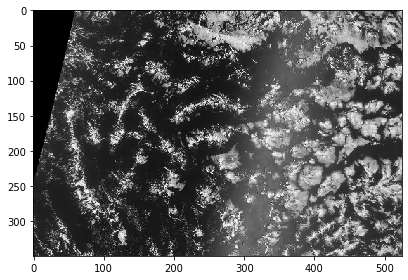

In [146]:
io.imshow(im2)

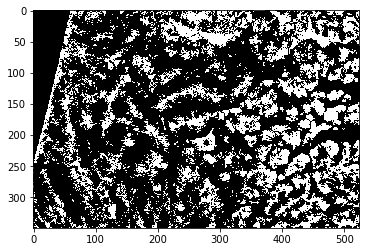

In [147]:
th3 = cv.adaptiveThreshold(im2,1,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,31,-5)
plt.imshow(th3,cmap='gray')

In [160]:
s_ele = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,7));
s_ele2 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3));

In [161]:
imc = cv.morphologyEx(th3, cv.MORPH_OPEN, s_ele2)

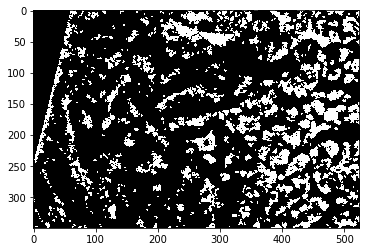

In [162]:
plt.imshow(imc,cmap='gray')

In [151]:
imco = cv.morphologyEx(th3, cv.MORPH_CLOSE, s_ele2)

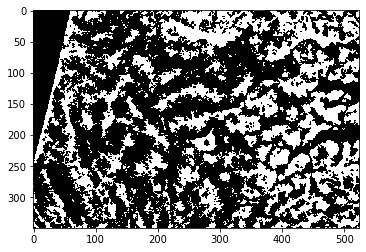

In [152]:
plt.imshow(imco,cmap='gray')

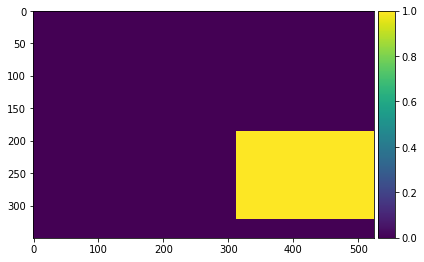

In [109]:
msk = io.imread('../fish/lbl_fish_rsz/0879076.png')
io.imshow(msk)

In [110]:
msk_b = msk.astype(np.bool)

In [111]:
th3.shape,msk_b.shape

((350, 525), (350, 525))

In [112]:
_ = th3*msk_b

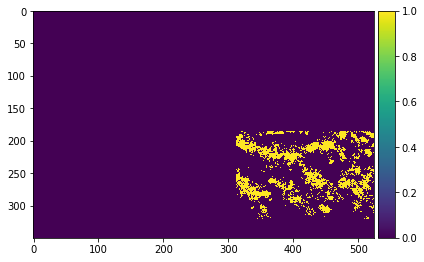

In [113]:
io.imshow(_)

In [118]:
msk_surr = 2*(msk-_)

In [119]:
msk_f = msk_surr+_

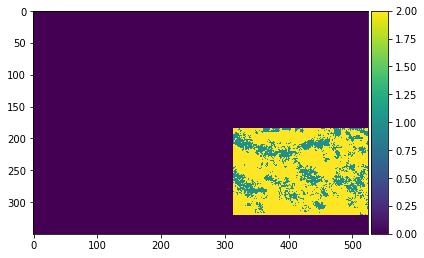

In [120]:
io.imshow(msk_f)

In [90]:
fls[0]

PosixPath('../train_rsz/959c283.png')

In [103]:
warnings.filterwarnings('ignore')

# make datasets

In [163]:
# make fish labels
fls = [fl for fl in data.iterdir() if fl.is_file()]
s_ele = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3));
for fl in tqdm(fls):
    img = io.imread(fl)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    th3 = cv.adaptiveThreshold(img,1,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,31,-5)
    imc = cv.morphologyEx(th3, cv.MORPH_OPEN, s_ele)
    msk = io.imread(lbl_fish/fl.name)
    msk_cloud = imc*msk
    #msk_surr = (msk-msk_cloud)
    #msk_f = msk_cloud+2*msk_surr
    io.imsave(lbl_fish_detailed/fl.name,msk_cloud)